In [1]:
import torch

state_dict = torch.load('./models/period_classification_5_period_sparse')

In [3]:
for key in state_dict:
    print(key)

conv1a.conv.weight
conv1a.conv.bias
conv1a.bn.weight
conv1a.bn.bias
conv1a.bn.running_mean
conv1a.bn.running_var
conv1b.conv.weight
conv1b.conv.bias
conv1b.bn.weight
conv1b.bn.bias
conv1b.bn.running_mean
conv1b.bn.running_var
conv2.conv3a.weight
conv2.conv3a.bias
conv2.conv3b.weight
conv2.conv3b.bias
conv2.conv5a.weight
conv2.conv5a.bias
conv2.conv5b.weight
conv2.conv5b.bias
conv2.conv5c.weight
conv2.conv5c.bias
conv2.conv7a.weight
conv2.conv7a.bias
conv2.conv7b.weight
conv2.conv7b.bias
conv2.conv7c.weight
conv2.conv7c.bias
conv2.conv7d.weight
conv2.conv7d.bias
conv2.norm.weight
conv2.norm.bias
conv2.norm.running_mean
conv2.norm.running_var
conv3.conv3a.weight
conv3.conv3a.bias
conv3.conv3b.weight
conv3.conv3b.bias
conv3.conv5a.weight
conv3.conv5a.bias
conv3.conv5b.weight
conv3.conv5b.bias
conv3.conv5c.weight
conv3.conv5c.bias
conv3.conv7a.weight
conv3.conv7a.bias
conv3.conv7b.weight
conv3.conv7b.bias
conv3.conv7c.weight
conv3.conv7c.bias
conv3.conv7d.weight
conv3.conv7d.bias
conv3.nor

In [72]:
conv2a_weight = state_dict['conv1b.conv.weight']
print(type(conv2a_weight))
print(len(conv2a_weight))
print(conv2a_weight)

<class 'torch.cuda.FloatTensor'>
32

(0 ,0 ,.,.) = 
  4.0259e-02 -4.4279e-02 -4.2482e-02
  3.0901e-02  9.9691e-03 -2.0039e-02
  2.8754e-02  7.7797e-02 -5.0466e-02

(0 ,1 ,.,.) = 
 -8.8748e-02 -8.7945e-02 -1.1851e-02
  9.1272e-02  1.1534e-01 -9.3559e-02
 -3.2011e-02  1.8975e-02  4.0661e-02

(0 ,2 ,.,.) = 
 -1.1374e-01 -9.7421e-02 -4.1713e-02
 -9.0997e-02 -2.3683e-02 -3.2082e-02
  1.3282e-02 -8.8893e-02 -1.3434e-02
   ...

(0 ,29,.,.) = 
 -2.1854e-02  4.3555e-02  3.5659e-02
 -5.2154e-02 -6.7232e-02  5.7064e-02
 -2.6866e-02  1.6389e-02  5.5025e-02

(0 ,30,.,.) = 
 -1.3009e-01 -7.6099e-05  1.0652e-01
 -8.9760e-02 -9.2289e-02 -2.4751e-02
  1.3719e-02  5.7358e-02  1.0745e-01

(0 ,31,.,.) = 
 -3.9040e-02 -2.0711e-02 -8.1086e-02
  5.5376e-02  4.2541e-02 -9.3532e-02
  3.3832e-02  8.2010e-02 -1.8249e-02
     ⋮ 

(1 ,0 ,.,.) = 
 -2.7276e-02 -1.7319e-02  2.7172e-02
 -3.5186e-02 -5.5298e-03 -2.6104e-02
  3.6835e-02  8.9773e-03 -4.3686e-02

(1 ,1 ,.,.) = 
 -3.3915e-02  5.0284e-02  1.7167e-02
 -8.068

In [68]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_kernel(kernels):
    
    weight_min, weight_max = np.amin(kernels), np.amax(kernels)
    n_kernels = len(kernels)
    kernels = np.split(kernels, n_kernels, axis=0)
    n_row, n_column = int(n_kernels / 8), 8
    # cmap = plt.cm.plasma
    cmap = plt.cm.Greys
    
    fig, axes = plt.subplots(nrows=n_row, ncols=n_column)
    
    plt.setp(axes, xticks=[], yticks=[])
    for k, ax in enumerate(axes.flat):
        kernel = kernels[k]
        im = ax.imshow(kernel.squeeze(), cmap=cmap, vmin=weight_min, vmax= weight_max)
        
    cbar_ax = fig.add_axes([1.00, 0.15, 0.05, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    
    plt.show()

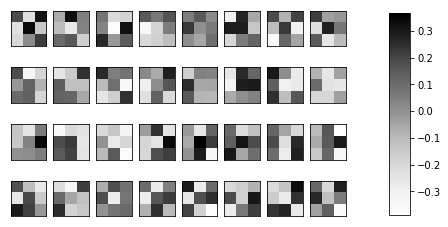

In [69]:
kernels = conv1a_weight.cpu().numpy()
plot_kernel(kernels)